In [ ]:
 import numpy as np
 from skimage import io, color, exposure
 import matplotlib.pyplot as plt

In [ ]:
I = io.imread('/content/drive/MyDrive/CSE428/LAB3/land.jpeg')
print(I.shape)

(683, 1024)


(-0.5, 1023.5, 682.5, -0.5)

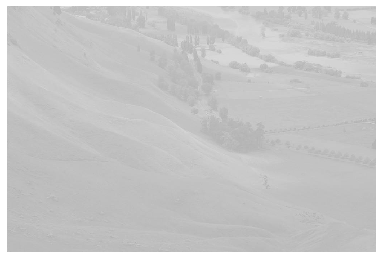

In [ ]:
io.imshow(I)
plt.axis("off")

In [ ]:
hist, bins_hist = exposure.histogram(I.ravel(), nbins = 256, normalize = False)



In [ ]:
cdf, bins_cdf = 

In [ ]:
hist


array([    1,     6,     7,    15,    62,   195,   746,  2260,  3021,
        4603,  6454, 10333, 16874, 27181, 37352, 46865, 52578, 47642,
       42541, 44650, 49073, 39212, 37344, 41421, 34243, 28128, 22966,
       19715, 15245, 12023,  9939,  7446,  5353,  4145,  3130,  3102,
        3253,  3508,  3688,  3115,  3221,  5015,  1310,   289,    81,
          25,    13,     3])

In [ ]:
bins_hist

array([174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221])

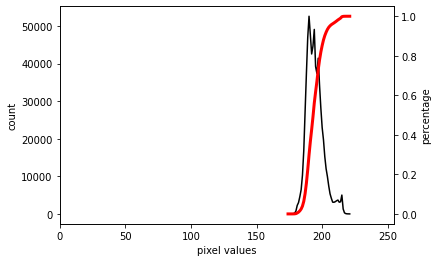

In [ ]:
plt.rcParams[('figure.figsize')]= (6,4)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("pixel values")
plt.ylabel('count')
plt.xlim([0, 255])

#Twin Axis
plt.twinx()
plt.plot(bins_cdf, cdf, 'r', lw = 3)
plt.ylabel('percentage')
plt.show()

In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    
    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")



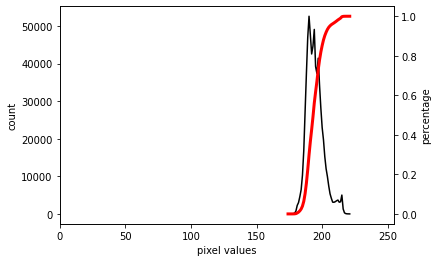

In [ ]:
plot_hist(I)
plt.show()

In [ ]:
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

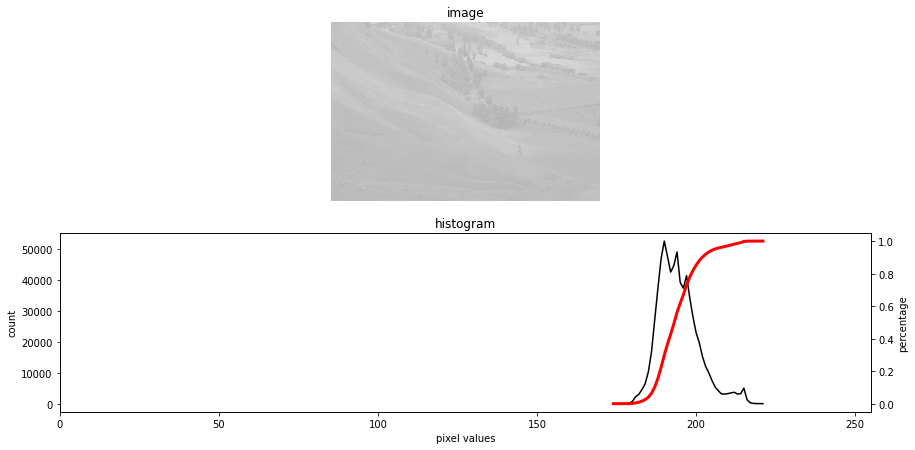

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)
plt.show()

In [ ]:
I = io.imread('/content/drive/MyDrive/CSE428/LAB3/good.jpeg')
print(I.shape)

(756, 1008, 3)


In [ ]:
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])
        
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

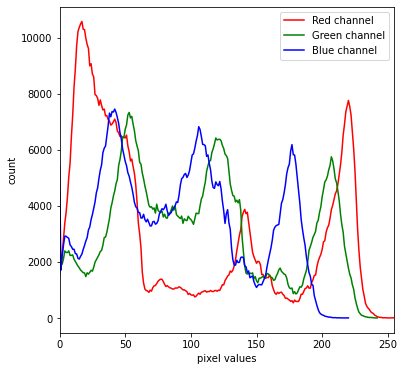

In [ ]:
plot_hist_color(I)
plt.show()

Text(0.5, 1.0, 'Blue')

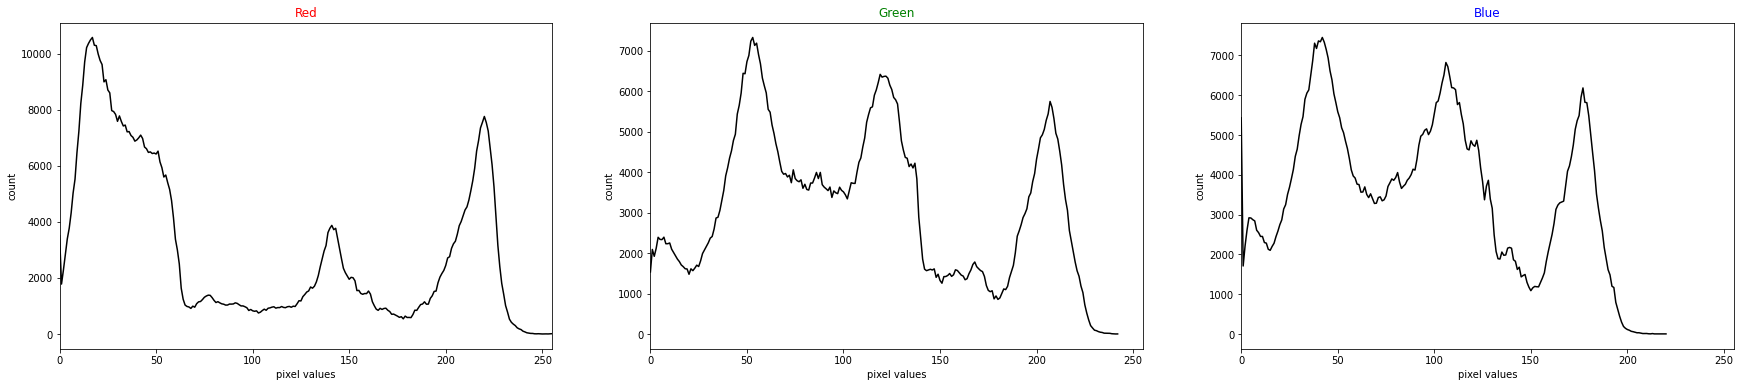

In [ ]:
plt.rcParams['figure.figsize']=(30,6)
plt.subplot(1,3, 1)
plot_hist(I[:,:,0], plot_cdf = False)
plt.title("Red",color='red')

plt.subplot(1,3, 2)
plot_hist(I[:,:,1], plot_cdf = False)
plt.title("Green",color = 'green')

plt.subplot(1,3, 3)
plot_hist(I[:,:,2], plot_cdf = False)
plt.title("Blue",color = 'blue')

In [ ]:
I = io.imread('/content/drive/MyDrive/CSE428/LAB3/good.jpeg')
I = I/255

In [ ]:
Ieq=I.copy()
Ieq[:,:,0] = exposure.equalize_hist(I[:,:,0])
Ieq[:,:,1] = exposure.equalize_hist(I[:,:,1])
Ieq[:,:,2] = exposure.equalize_hist(I[:,:,2])

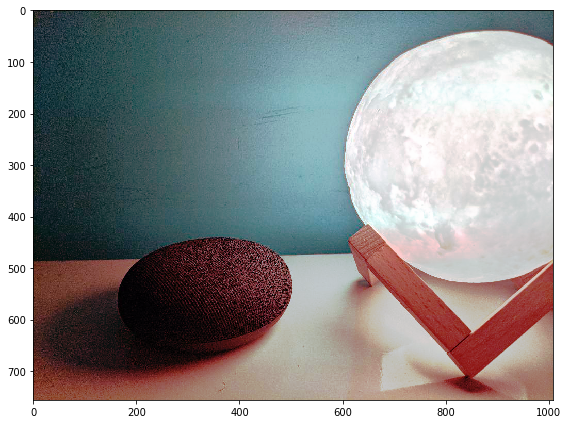

In [ ]:
io.imshow(Ieq)

In [ ]:
Ilab = color.rgb2lab(I)
print(I.shape)# Values between 0-1
print(Ilab.shape)#Values between 0-100

(756, 1008, 3)
(756, 1008, 3)


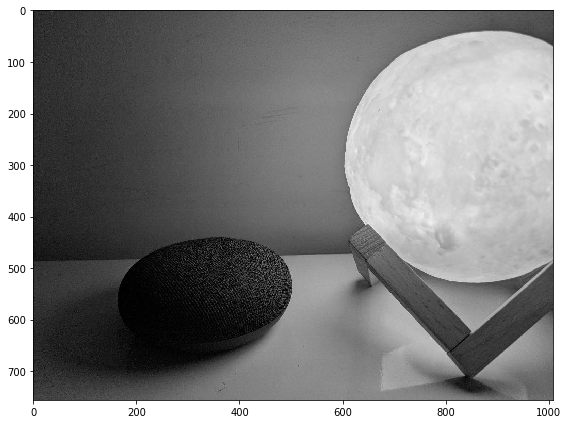

In [ ]:
io.imshow(Ilab[:,:,0])

In [ ]:
Ilab[:,:,0] = Ilab[:,:,0]/100

In [ ]:
Ieq = exposure.equalize_hist(Ilab[:,:,0])